# Importação da base de dados

In [ ]:
import pandas as pd

df = pd.read_excel("https://raw.githubusercontent.com/pauloandreoliv/Projeto-TEBD/main/Sample%20-%20Superstore.xlsm", sheet_name=0)

print(df)

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9993    9994  CA-2017-119914 2017-05-04 2017-05-09    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson 

# Análise exploratória dos dados (EDA)

## Dicionário da base de dados

1. Row ID: ID único para cada linha
2. Order ID: ID único para cada combinação de pedido (com data) e cliente
3. Order Date: Data do pedido
4. Ship Date: Data do envio
5. Ship Mode: Modo de envio especificado pelo cliente
6. Customer ID: ID único para cada cliente
7. Customer Name: Nome do cliente
8. Segment: Segmento ao qual o cliente pertence
9. Country: País de residência do cliente
10. City: Cidade de residência do cliente
11. State: Estado de residência do cliente
12. Postal Code: Código postal de cada cliente
13. Region: Região onde o cliente reside
14. Product ID: ID único do produto
15. Category: Categoria do produto encomendado
16. Sub-Category: Subcategoria do produto encomendado
17. Product Name: Nome do produto
18. Sales: Vendas do produto
19. Quantity: Quantidade do produto
20. Discount: Desconto oferecido
21. Profit: Lucro/Prejuízo obtido


## Pandas profiling

### Instalando biblioteca

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 60.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=3d5d5e15c1748ff92a7d595e21c06ae94aa2d6f68c3a6d431b62392eb5ac1682
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


### Profile

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df)

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Verificações

In [ ]:
print("Número de padrões = ", len(df))
print("Número de atributos = ", len(df.columns))
print("Lista de atributos = ", df.columns.values)

Número de padrões =  9994
Número de atributos =  21
Lista de atributos =  ['Row ID' 'Order ID' 'Order Date' 'Ship Date' 'Ship Mode' 'Customer ID'
 'Customer Name' 'Segment' 'Country' 'City' 'State' 'Postal Code' 'Region'
 'Product ID' 'Category' 'Sub-Category' 'Product Name' 'Sales' 'Quantity'
 'Discount' 'Profit']


In [ ]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [ ]:
df.duplicated().sum()

0

## Resultados

1. Valores Ausentes ou Nulos:
   Não foram identificados valores ausentes ou nulos no conjunto de dados.

2. Valores Duplicados:
   Não foram identificados valores duplicados no conjunto de dados.

3. Variáveis de Data:
   * Foram identificadas duas variáveis de data:
     * Order Date: Data do pedido.
     * Ship Date: Data do envio.

4. Variável Row ID:
   A variável Row ID possui todos os valores únicos.
   Esta variável é insignificante para a análise, pois serve apenas como identificador da linha.

5. Variável Country:
   A variável Contry possui todos os valores iguais.
   Esta variável é insignificante para a análise, pois apresenta um único valor para todos os padrões.


6. Características:
   A base de dados possui um total de 9994 padrões e 21 atributos

# Preparação dos dados

## Removendo colunas

A partir dos resultados da análise exploratória dos dados foi possível a tomada de decisões como a remoção das seguintes colunas:

* No caso da variável Row ID, tal decisão foi tomada tendo em vista que os seus valores representam unicamente os identificadores

* No caso da variável Country, a decisão foi tomada tendo em vista que ela possui um único valor que se repete em todos os padrões

In [ ]:
df = df.drop(['Row ID', 'Country'], axis=1)

Verificando colunas após a remoção das colunas desejadas

In [ ]:
print("Número de padrões = ", len(df))
print("Número de atributos = ", len(df.columns))
print("Lista de atributos = ", df.columns.values)

Número de padrões =  9994
Número de atributos =  19
Lista de atributos =  ['Order ID' 'Order Date' 'Ship Date' 'Ship Mode' 'Customer ID'
 'Customer Name' 'Segment' 'City' 'State' 'Postal Code' 'Region'
 'Product ID' 'Category' 'Sub-Category' 'Product Name' 'Sales' 'Quantity'
 'Discount' 'Profit']


## Construindo coluna ***Cost***

Construindo nova coluna para possibilitar a análise de custos, definido como ***Cost = Sales - Profit***

In [ ]:
df['Cost'] = df['Sales'] - df['Profit']

Verificando colunas após a construção da coluna ***Cost***

In [ ]:
print("Número de padrões = ", len(df))
print("Número de atributos = ", len(df.columns))
print("Lista de atributos = ", df.columns.values)

Número de padrões =  9994
Número de atributos =  20
Lista de atributos =  ['Order ID' 'Order Date' 'Ship Date' 'Ship Mode' 'Customer ID'
 'Customer Name' 'Segment' 'City' 'State' 'Postal Code' 'Region'
 'Product ID' 'Category' 'Sub-Category' 'Product Name' 'Sales' 'Quantity'
 'Discount' 'Profit' 'Cost']


Verificando resultados da construção da coluna ***Cost***

In [ ]:
df[['Sales', 'Profit','Cost']]

Sales    Profit       Cost
0     261.9600   41.9136   220.0464
1     731.9400  219.5820   512.3580
2      14.6200    6.8714     7.7486
3     957.5775 -383.0310  1340.6085
4      22.3680    2.5164    19.8516
...        ...       ...        ...
9989   25.2480    4.1028    21.1452
9990   91.9600   15.6332    76.3268
9991  258.5760   19.3932   239.1828
9992   29.6000   13.3200    16.2800
9993  243.1600   72.9480   170.2120

[9994 rows x 3 columns]

## Construindo dimensão de período



> Unindo colunas de data



In [ ]:
dates = pd.concat([df['Order Date'], df['Ship Date']]).drop_duplicates().sort_values()



> Criando DataFrame temporário



In [ ]:
dim_period = pd.DataFrame({
    'DateKey': range(1, len(dates) + 1),
    'Date': dates,
    'Day': dates.dt.day,
    'Month': dates.dt.month,
    'Year': dates.dt.year
})



> Avaliando resultado



In [ ]:
dim_period.head()

DateKey       Date  Day  Month  Year
7980        1 2014-01-03    3      1  2014
739         2 2014-01-04    4      1  2014
1759        3 2014-01-05    5      1  2014
5327        4 2014-01-06    6      1  2014
7660        5 2014-01-07    7      1  2014



> Mesclando DataFrames com colunas necessárias



In [ ]:
df = df.merge(dim_period[['Date', 'DateKey']], left_on='Order Date', right_on='Date', how='left')
df = df.rename(columns={'DateKey': 'OrderDateKey'})
df = df.drop(columns=['Date'])

In [ ]:
df = df.merge(dim_period[['Date', 'DateKey']], left_on='Ship Date', right_on='Date', how='left')
df = df.rename(columns={'DateKey': 'ShipDateKey'})
df = df.drop(columns=['Date'])



> Avaliando resultado da mesclagem



In [ ]:
df.head()

Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment             City       State  Postal Code  ...  \
0      Claire Gute   Consumer        Henderson    Kentucky        42420  ...   
1      Claire Gute   Consumer        Henderson    Kentucky        42420  ...   
2  Darrin Van Huff  Corporate      Los Angeles  California        90036  ...   
3   Sean O'Donnell   Consumer  Fort Lauderdale     Florida        33311  ...   
4   Sean O'Donnell   Consumer  Fort Lauderdale     Florida        33311  ...   

          Category Sub-Category  \
0        Furniture    Bookcases   
1        Furniture       Chairs   
2  Office Supplies       Labels   
3        Furniture       Tables   
4  Office Supplies      Storage   

                                        Product Name     Sales Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600        2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400        3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200        2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775        5   
4                     Eldon Fold 'N Roll Cart System   22.3680        2   

   Discount    Profit       Cost  OrderDateKey  ShipDateKey  
0      0.00   41.9136   220.0464          1011         1014  
1      0.00  219.5820   512.3580          1011         1014  
2      0.00    6.8714     7.7486           863          867  
3      0.45 -383.0310  1340.6085           623          630  
4      0.20    2.5164    19.8516           623          630  

[5 rows x 22 columns]



> Removendo colunas de data do DataFrame principal



In [ ]:
df = df.drop(['Order Date', 'Ship Date'], axis=1)



> Verificando resultado após remoção



In [ ]:
print("Número de padrões = ", len(df))
print("Número de atributos = ", len(df.columns))
print("Lista de atributos = ", df.columns.values)

Número de padrões =  9994
Número de atributos =  20
Lista de atributos =  ['Order ID' 'Ship Mode' 'Customer ID' 'Customer Name' 'Segment' 'City'
 'State' 'Postal Code' 'Region' 'Product ID' 'Category' 'Sub-Category'
 'Product Name' 'Sales' 'Quantity' 'Discount' 'Profit' 'Cost'
 'OrderDateKey' 'ShipDateKey']


## Construindo coluna ***stateabbreviation***

Construindo coluna com a abreviação do nome do estado

> Importando biblioteca para gerar abreviações



In [ ]:
pip install us



> Função que gera abreviação



In [ ]:
import us

def get_state_abbreviation(state_name):
    try:
        state = us.states.lookup(state_name)
        return state.abbr if state else None
    except Exception as e:
        print(f"Erro ao obter a sigla para {state_name}: {e}")
        return None

In [ ]:
temp_state = df[['State']].drop_duplicates()

temp_state.head()

State
0         Kentucky
2       California
3          Florida
12  North Carolina
13      Washington

In [ ]:
temp_state['stateabbreviation'] = temp_state['State'].apply(get_state_abbreviation)

temp_state.head()

State stateabbreviation
0         Kentucky                KY
2       California                CA
3          Florida                FL
12  North Carolina                NC
13      Washington                WA

In [ ]:
df = df.merge(temp_state[['State', 'stateabbreviation']], on=['State'], how='left')

## Separando dimensões

* Sale: Sales, Quantity, Discount, Profit, Cost, OrderID, ProductKey, CustomerKey, RegionKey, ProductKey, CustomerKey, OrderDateKey, ShipDateKey

* Ship Mode: ShipModeKey, Name

* Product: ProductKey, ProductID, Category, Sub-Category, Product Name

* Customer: CustomerKey, CustomerID, Customer Name, Segment

* Region: RegionKey, City, State, Region, Postal Code, stateabbreviation

* Period: DateKey,	Date,	Day,	Month,	Year


### Period

A dimensão Period possui colunas que resultaram do processo de construção de novos atributos a partir da fragmentação dos atributos de datas (Ship Date e Order Date)

In [ ]:
dim_period = dim_period

dim_period.head()

DateKey       Date  Day  Month  Year
7980        1 2014-01-03    3      1  2014
739         2 2014-01-04    4      1  2014
1759        3 2014-01-05    5      1  2014
5327        4 2014-01-06    6      1  2014
7660        5 2014-01-07    7      1  2014

### Region

Nesta seção ocorre a separação das colunas do DataFrame principal para a formação da dimensão Region, a criação do RegionKey e a remoção das colunas separadas do DF principal

In [ ]:
dim_region = df[['City', 'State', 'Region', 'Postal Code','stateabbreviation']].drop_duplicates()

dim_region['RegionKey'] = range(1, len(dim_region) + 1)

dim_region.head()

City           State Region  Postal Code stateabbreviation  \
0         Henderson        Kentucky  South        42420                KY   
2       Los Angeles      California   West        90036                CA   
3   Fort Lauderdale         Florida  South        33311                FL   
5       Los Angeles      California   West        90032                CA   
12          Concord  North Carolina  South        28027                NC   

    RegionKey  
0           1  
2           2  
3           3  
5           4  
12          5

In [ ]:
df = df.merge(dim_region[['City', 'State', 'Region', 'Postal Code', 'stateabbreviation', 'RegionKey']], on=['City', 'State', 'Region', 'Postal Code', 'stateabbreviation'], how='left')

In [ ]:
df = df.drop(['City', 'State', 'Region', 'Postal Code', 'stateabbreviation'], axis=1)

In [ ]:
df.head()

Order ID       Ship Mode Customer ID    Customer Name    Segment  \
0  CA-2016-152156    Second Class    CG-12520      Claire Gute   Consumer   
1  CA-2016-152156    Second Class    CG-12520      Claire Gute   Consumer   
2  CA-2016-138688    Second Class    DV-13045  Darrin Van Huff  Corporate   
3  US-2015-108966  Standard Class    SO-20335   Sean O'Donnell   Consumer   
4  US-2015-108966  Standard Class    SO-20335   Sean O'Donnell   Consumer   

        Product ID         Category Sub-Category  \
0  FUR-BO-10001798        Furniture    Bookcases   
1  FUR-CH-10000454        Furniture       Chairs   
2  OFF-LA-10000240  Office Supplies       Labels   
3  FUR-TA-10000577        Furniture       Tables   
4  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit       Cost  OrderDateKey  ShipDateKey  RegionKey  
0      0.00   41.9136   220.0464          1011         1014          1  
1      0.00  219.5820   512.3580          1011         1014          1  
2      0.00    6.8714     7.7486           863          867          2  
3      0.45 -383.0310  1340.6085           623          630          3  
4      0.20    2.5164    19.8516           623          630          3

### Ship Mode

Nesta seção ocorre a separação das colunas do DataFrame principal para a formação da dimensão Ship Mode, a criação do ShipModeKey e a remoção das colunas separadas do DF principal

In [ ]:
dim_shipmode = df[['Ship Mode']].drop_duplicates()

dim_shipmode['ShipModeKey'] = range(1, len(dim_shipmode) + 1)

In [ ]:
dim_shipmode.head()

Ship Mode  ShipModeKey
0      Second Class            1
3    Standard Class            2
35      First Class            3
366        Same Day            4

In [ ]:
df = df.merge(dim_shipmode[['Ship Mode', 'ShipModeKey']], on=['Ship Mode'], how='left')

In [ ]:
df = df.drop(['Ship Mode'], axis=1)

In [ ]:
df.head()

Order ID Customer ID    Customer Name    Segment       Product ID  \
0  CA-2016-152156    CG-12520      Claire Gute   Consumer  FUR-BO-10001798   
1  CA-2016-152156    CG-12520      Claire Gute   Consumer  FUR-CH-10000454   
2  CA-2016-138688    DV-13045  Darrin Van Huff  Corporate  OFF-LA-10000240   
3  US-2015-108966    SO-20335   Sean O'Donnell   Consumer  FUR-TA-10000577   
4  US-2015-108966    SO-20335   Sean O'Donnell   Consumer  OFF-ST-10000760   

          Category Sub-Category  \
0        Furniture    Bookcases   
1        Furniture       Chairs   
2  Office Supplies       Labels   
3        Furniture       Tables   
4  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit       Cost  OrderDateKey  ShipDateKey  RegionKey  \
0      0.00   41.9136   220.0464          1011         1014          1   
1      0.00  219.5820   512.3580          1011         1014          1   
2      0.00    6.8714     7.7486           863          867          2   
3      0.45 -383.0310  1340.6085           623          630          3   
4      0.20    2.5164    19.8516           623          630          3   

   ShipModeKey  
0            1  
1            1  
2            1  
3            2  
4            2

In [ ]:
print("Número de padrões = ", len(df))
print("Número de atributos = ", len(df.columns))
print("Lista de atributos = ", df.columns.values)

Número de padrões =  9994
Número de atributos =  17
Lista de atributos =  ['Order ID' 'Customer ID' 'Customer Name' 'Segment' 'Product ID'
 'Category' 'Sub-Category' 'Product Name' 'Sales' 'Quantity' 'Discount'
 'Profit' 'Cost' 'OrderDateKey' 'ShipDateKey' 'RegionKey' 'ShipModeKey']


### Product

Nesta seção ocorre a separação das colunas do DataFrame principal para a formação da dimensão Product e a remoção das colunas separadas do DF principal

In [ ]:
dim_product = df[['Product ID','Category','Sub-Category','Product Name']].drop_duplicates()

In [ ]:
dim_product['ProductKey'] = range(1, len(dim_product) + 1)

In [ ]:
dim_product.head()

Product ID         Category Sub-Category  \
0  FUR-BO-10001798        Furniture    Bookcases   
1  FUR-CH-10000454        Furniture       Chairs   
2  OFF-LA-10000240  Office Supplies       Labels   
3  FUR-TA-10000577        Furniture       Tables   
4  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name  ProductKey  
0                  Bush Somerset Collection Bookcase           1  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...           2  
2  Self-Adhesive Address Labels for Typewriters b...           3  
3      Bretford CR4500 Series Slim Rectangular Table           4  
4                     Eldon Fold 'N Roll Cart System           5

In [ ]:
df = df.merge(dim_product[['Product ID','Category','Sub-Category','Product Name', 'ProductKey']], on=['Product ID','Category','Sub-Category','Product Name'], how='left')

In [ ]:
df = df.drop(['Product ID','Category','Sub-Category','Product Name'], axis=1)

In [ ]:
df.head()

Order ID Customer ID    Customer Name    Segment     Sales  Quantity  \
0  CA-2016-152156    CG-12520      Claire Gute   Consumer  261.9600         2   
1  CA-2016-152156    CG-12520      Claire Gute   Consumer  731.9400         3   
2  CA-2016-138688    DV-13045  Darrin Van Huff  Corporate   14.6200         2   
3  US-2015-108966    SO-20335   Sean O'Donnell   Consumer  957.5775         5   
4  US-2015-108966    SO-20335   Sean O'Donnell   Consumer   22.3680         2   

   Discount    Profit       Cost  OrderDateKey  ShipDateKey  RegionKey  \
0      0.00   41.9136   220.0464          1011         1014          1   
1      0.00  219.5820   512.3580          1011         1014          1   
2      0.00    6.8714     7.7486           863          867          2   
3      0.45 -383.0310  1340.6085           623          630          3   
4      0.20    2.5164    19.8516           623          630          3   

   ShipModeKey  ProductKey  
0            1           1  
1            1           2  
2            1           3  
3            2           4  
4            2           5

In [ ]:
print("Número de padrões = ", len(df))
print("Número de atributos = ", len(df.columns))
print("Lista de atributos = ", df.columns.values)

Número de padrões =  9994
Número de atributos =  14
Lista de atributos =  ['Order ID' 'Customer ID' 'Customer Name' 'Segment' 'Sales' 'Quantity'
 'Discount' 'Profit' 'Cost' 'OrderDateKey' 'ShipDateKey' 'RegionKey'
 'ShipModeKey' 'ProductKey']


### Customer

Nesta seção ocorre a separação das colunas do DataFrame principal para a formação da dimensão Customer e a remoção das colunas separadas do DF principal

In [ ]:
dim_customer = df[['Customer ID','Customer Name','Segment']].drop_duplicates()

In [ ]:
dim_customer['CustomerKey'] = range(1, len(dim_customer) + 1)

In [ ]:
dim_customer.head()

Customer ID    Customer Name    Segment  CustomerKey
0     CG-12520      Claire Gute   Consumer            1
2     DV-13045  Darrin Van Huff  Corporate            2
3     SO-20335   Sean O'Donnell   Consumer            3
5     BH-11710  Brosina Hoffman   Consumer            4
12    AA-10480     Andrew Allen   Consumer            5

In [ ]:
df = df.merge(dim_customer[['Customer ID','Customer Name','Segment','CustomerKey']], on=['Customer ID','Customer Name','Segment'], how='left')

In [ ]:
df = df.drop(['Customer ID','Customer Name','Segment'], axis=1)

In [ ]:
df.head()

Order ID     Sales  Quantity  Discount    Profit       Cost  \
0  CA-2016-152156  261.9600         2      0.00   41.9136   220.0464   
1  CA-2016-152156  731.9400         3      0.00  219.5820   512.3580   
2  CA-2016-138688   14.6200         2      0.00    6.8714     7.7486   
3  US-2015-108966  957.5775         5      0.45 -383.0310  1340.6085   
4  US-2015-108966   22.3680         2      0.20    2.5164    19.8516   

   OrderDateKey  ShipDateKey  RegionKey  ShipModeKey  ProductKey  CustomerKey  
0          1011         1014          1            1           1            1  
1          1011         1014          1            1           2            1  
2           863          867          2            1           3            2  
3           623          630          3            2           4            3  
4           623          630          3            2           5            3

### Tabela de fatos

Verificando resultado

In [ ]:
df.head()

Order ID     Sales  Quantity  Discount    Profit       Cost  \
0  CA-2016-152156  261.9600         2      0.00   41.9136   220.0464   
1  CA-2016-152156  731.9400         3      0.00  219.5820   512.3580   
2  CA-2016-138688   14.6200         2      0.00    6.8714     7.7486   
3  US-2015-108966  957.5775         5      0.45 -383.0310  1340.6085   
4  US-2015-108966   22.3680         2      0.20    2.5164    19.8516   

   OrderDateKey  ShipDateKey  RegionKey  ShipModeKey  ProductKey  CustomerKey  
0          1011         1014          1            1           1            1  
1          1011         1014          1            1           2            1  
2           863          867          2            1           3            2  
3           623          630          3            2           4            3  
4           623          630          3            2           5            3

## Formatação

Ajustando nomes das colunas para evitar incompatibilidades com ferramentas

In [ ]:
df = df.rename(columns={'Order ID': 'OrderID'})

In [ ]:
dim_customer = dim_customer.rename(columns={'Customer ID': 'CustomerID',	'Customer Name': 'CustomerName'})

dim_product = dim_product.rename(columns={'Product ID': 'ProductID',	'Sub-Category': 'SubCategory', 'Product Name': 'ProductName'})

dim_shipmode = dim_shipmode.rename(columns={'Ship Mode': 'ShipMode'})

dim_region = dim_region.rename(columns={'Postal Code': 'PostalCode'})

In [ ]:
df.columns = [col.lower() for col in df.columns]
dim_customer.columns = [col.lower() for col in dim_customer.columns]
dim_product.columns = [col.lower() for col in dim_product.columns]
dim_shipmode.columns = [col.lower() for col in dim_shipmode.columns]
dim_region.columns = [col.lower() for col in dim_region.columns]
dim_period.columns = [col.lower() for col in dim_period.columns]

Verificando resultados

In [ ]:
dim_customer.head()

customerid     customername    segment  customerkey
0    CG-12520      Claire Gute   Consumer            1
2    DV-13045  Darrin Van Huff  Corporate            2
3    SO-20335   Sean O'Donnell   Consumer            3
5    BH-11710  Brosina Hoffman   Consumer            4
12   AA-10480     Andrew Allen   Consumer            5

In [ ]:
dim_product.head()

productid         category subcategory  \
0  FUR-BO-10001798        Furniture   Bookcases   
1  FUR-CH-10000454        Furniture      Chairs   
2  OFF-LA-10000240  Office Supplies      Labels   
3  FUR-TA-10000577        Furniture      Tables   
4  OFF-ST-10000760  Office Supplies     Storage   

                                         productname  productkey  
0                  Bush Somerset Collection Bookcase           1  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...           2  
2  Self-Adhesive Address Labels for Typewriters b...           3  
3      Bretford CR4500 Series Slim Rectangular Table           4  
4                     Eldon Fold 'N Roll Cart System           5

In [ ]:
dim_shipmode.head()

shipmode  shipmodekey
0      Second Class            1
3    Standard Class            2
35      First Class            3
366        Same Day            4

In [ ]:
dim_region.head()

city           state region  postalcode stateabbreviation  \
0         Henderson        Kentucky  South       42420                KY   
2       Los Angeles      California   West       90036                CA   
3   Fort Lauderdale         Florida  South       33311                FL   
5       Los Angeles      California   West       90032                CA   
12          Concord  North Carolina  South       28027                NC   

    regionkey  
0           1  
2           2  
3           3  
5           4  
12          5

In [ ]:
df.head()

orderid     sales  quantity  discount    profit       cost  \
0  CA-2016-152156  261.9600         2      0.00   41.9136   220.0464   
1  CA-2016-152156  731.9400         3      0.00  219.5820   512.3580   
2  CA-2016-138688   14.6200         2      0.00    6.8714     7.7486   
3  US-2015-108966  957.5775         5      0.45 -383.0310  1340.6085   
4  US-2015-108966   22.3680         2      0.20    2.5164    19.8516   

   orderdatekey  shipdatekey  regionkey  shipmodekey  productkey  customerkey  
0          1011         1014          1            1           1            1  
1          1011         1014          1            1           2            1  
2           863          867          2            1           3            2  
3           623          630          3            2           4            3  
4           623          630          3            2           5            3

# Carga dos dados na base de dados

A partir das preparações realizadas, podemos considerar o nosso dataframe final como a nossa tabela de fatos

In [ ]:
fct_sale = df

fct_sale.head()

orderid     sales  quantity  discount    profit       cost  \
0  CA-2016-152156  261.9600         2      0.00   41.9136   220.0464   
1  CA-2016-152156  731.9400         3      0.00  219.5820   512.3580   
2  CA-2016-138688   14.6200         2      0.00    6.8714     7.7486   
3  US-2015-108966  957.5775         5      0.45 -383.0310  1340.6085   
4  US-2015-108966   22.3680         2      0.20    2.5164    19.8516   

   orderdatekey  shipdatekey  regionkey  shipmodekey  productkey  customerkey  
0          1011         1014          1            1           1            1  
1          1011         1014          1            1           2            1  
2           863          867          2            1           3            2  
3           623          630          3            2           4            3  
4           623          630          3            2           5            3

## Formato final de dimensões e tabela de fatos

In [ ]:
print(" fct_sale = ", fct_sale.columns.values)
print("\n dim_period = ", dim_period.columns.values)
print("\n dim_customer = ", dim_customer.columns.values)
print("\n dim_product = ", dim_product.columns.values)
print("\n dim_region = ", dim_region.columns.values)
print("\n dim_shipmode = ", dim_shipmode.columns.values)

 fct_sale =  ['orderid' 'sales' 'quantity' 'discount' 'profit' 'cost' 'orderdatekey'
 'shipdatekey' 'regionkey' 'shipmodekey' 'productkey' 'customerkey']

 dim_period =  ['datekey' 'date' 'day' 'month' 'year']

 dim_customer =  ['customerid' 'customername' 'segment' 'customerkey']

 dim_product =  ['productid' 'category' 'subcategory' 'productname' 'productkey']

 dim_region =  ['city' 'state' 'region' 'postalcode' 'stateabbreviation' 'regionkey']

 dim_shipmode =  ['shipmode' 'shipmodekey']


## Instalando bibliotecas necessárias para a conexão ao banco de dados

In [ ]:
pip install psycopg2 cryptography sqlalchemy

## Limpando base de dados existentes no servidor

Neste projeto, em caso de reexecução do notebook Colab vale realizar a limpeza da base de dados existente na plataforma Aiven Cloud, responsável pela hospedagem do servidor PostgreSQL

In [ ]:
import psycopg2

timeout = 10
connection = psycopg2.connect(
    dbname="tebd",
    user="avnadmin",
    password="AVNS_EsXVvWLc081XeyAFgXu",
    host="pg-tebd-tebd.g.aivencloud.com",
    port="11321",
    connect_timeout=timeout
)

try:
    cursor = connection.cursor()

    cursor.execute("DROP TABLE IF EXISTS public.fct_sale;")
    cursor.execute("DROP TABLE IF EXISTS public.dim_shipmode;")
    cursor.execute("DROP TABLE IF EXISTS public.dim_period;")
    cursor.execute("DROP TABLE IF EXISTS public.dim_customer;")
    cursor.execute("DROP TABLE IF EXISTS public.dim_product;")
    cursor.execute("DROP TABLE IF EXISTS public.dim_region;")

    connection.commit()
finally:
    connection.close()

## Criando tabelas

Criando tabelas de dimensão

In [ ]:
import psycopg2

timeout = 10
connection = psycopg2.connect(
    dbname="tebd",
    user="avnadmin",
    password="AVNS_EsXVvWLc081XeyAFgXu",
    host="pg-tebd-tebd.g.aivencloud.com",
    port="11321",
    connect_timeout=timeout
)

try:
    cursor = connection.cursor()

    cursor.execute("CREATE TABLE dim_period (datekey SERIAL PRIMARY KEY, date DATE, day INT, month INT, year INT);")
    cursor.execute("CREATE TABLE dim_customer (customerkey SERIAL PRIMARY KEY, customerid VARCHAR(255), customername VARCHAR(255), segment VARCHAR(255));")
    cursor.execute("CREATE TABLE dim_product (productkey SERIAL PRIMARY KEY, productID VARCHAR(255), category VARCHAR(255), subcategory VARCHAR(255), productname VARCHAR(255));")
    cursor.execute("CREATE TABLE dim_region (regionkey SERIAL PRIMARY KEY, city VARCHAR(255), state VARCHAR(255), region VARCHAR(255), stateabbreviation VARCHAR(255), postalcode VARCHAR(20));")
    cursor.execute("CREATE TABLE dim_shipmode (shipmodekey SERIAL PRIMARY KEY, shipmode VARCHAR(255));")

    connection.commit()
finally:
    connection.close()

Criando tabela de fatos

In [ ]:
import psycopg2

timeout = 10
connection = psycopg2.connect(
    dbname="tebd",
    user="avnadmin",
    password="AVNS_EsXVvWLc081XeyAFgXu",
    host="pg-tebd-tebd.g.aivencloud.com",
    port="11321",
    connect_timeout=timeout
)

try:
    cursor = connection.cursor()

    cursor.execute("""
        CREATE TABLE fct_sale (
            orderid VARCHAR(255),
            sales DECIMAL(10, 2),
            quantity INT,
            discount DECIMAL(5, 2),
            profit DECIMAL(10, 2),
            cost DECIMAL(10, 2),
            orderdatekey INT,
            shipdatekey INT,
            customerkey INT,
            productkey INT,
            regionkey INT,
            shipmodekey INT,
            FOREIGN KEY (customerkey) REFERENCES dim_customer(customerkey),
            FOREIGN KEY (productkey) REFERENCES dim_product(productkey),
            FOREIGN KEY (orderdatekey) REFERENCES dim_period(datekey),
            FOREIGN KEY (shipdatekey) REFERENCES dim_period(datekey),
            FOREIGN KEY (regionkey) REFERENCES dim_region(regionkey),
            FOREIGN KEY (shipmodekey) REFERENCES dim_shipmode(shipmodekey)
        );
    """)

    connection.commit()
finally:
    connection.close()

Verificando tabelas existentes no BD

In [ ]:
import psycopg2

timeout = 10
connection = psycopg2.connect(
    dbname="tebd",
    user="avnadmin",
    password="AVNS_EsXVvWLc081XeyAFgXu",
    host="pg-tebd-tebd.g.aivencloud.com",
    port="11321",
    connect_timeout=timeout
)

try:
    cursor = connection.cursor()

    cursor.execute("SELECT table_name FROM information_schema.tables WHERE table_schema = 'public';")
    print(cursor.fetchall())

finally:
    connection.close()

[('dim_customer',), ('dim_period',), ('dim_product',), ('dim_region',), ('dim_shipmode',), ('fct_sale',)]


## Populando tabelas

Populando tabelas de dimensões

In [ ]:
from sqlalchemy import create_engine

user = "avnadmin"
password = "AVNS_EsXVvWLc081XeyAFgXu"
host = "pg-tebd-tebd.g.aivencloud.com"
port = 11321
database = "tebd"

engine = create_engine(f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}")

dim_period.to_sql('dim_period', con=engine, if_exists='append', index=False)
dim_customer.to_sql('dim_customer', con=engine, if_exists='append', index=False)
dim_product.to_sql('dim_product', con=engine, if_exists='append', index=False)
dim_region.to_sql('dim_region', con=engine, if_exists='append', index=False)
dim_shipmode.to_sql('dim_shipmode', con=engine, if_exists='append', index=False)

print("Dados inseridos com sucesso!")

Dados inseridos com sucesso!


Populando tabela de fatos

In [ ]:
from sqlalchemy import create_engine

user = "avnadmin"
password = "AVNS_EsXVvWLc081XeyAFgXu"
host = "pg-tebd-tebd.g.aivencloud.com"
port = 11321
database = "tebd"

engine = create_engine(f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}")

fct_sale.to_sql('fct_sale', con=engine, if_exists='append', index=False)

print("Dados inseridos com sucesso!")

Dados inseridos com sucesso!


## Verificando resultados

In [ ]:
import psycopg2

timeout = 10
connection = psycopg2.connect(
    dbname="tebd",
    user="avnadmin",
    password="AVNS_EsXVvWLc081XeyAFgXu",
    host="pg-tebd-tebd.g.aivencloud.com",
    port="11321",
    connect_timeout=timeout
)

try:
    cursor = connection.cursor()

    cursor.execute("SELECT * FROM fct_sale WHERE orderdatekey = 1")
    print(cursor.fetchone())

finally:
    connection.close()

('CA-2014-103800', Decimal('16.45'), 2, Decimal('0.20'), Decimal('5.55'), Decimal('10.90'), 1, 5, 25, 1559, 15, 2)


# Visualização dos dados

O dashboard com os relatórios e indicadores gráficos foi construído em:

**Dashboard:** [https://tebd-dashboard.streamlit.app/](https://tebd-dashboard.streamlit.app/)


Repositório com código-fonte do dashboard:

**GitHub** [https://github.com/pauloandreoliv/Projeto-TEBD](https://github.com/pauloandreoliv/Projeto-TEBD)

## Interpretação dos indicadores e relatórios

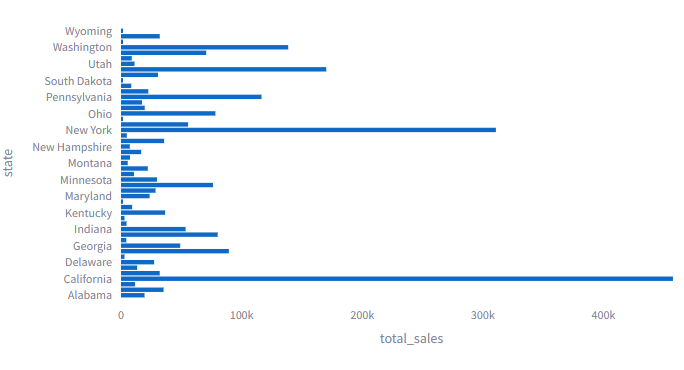

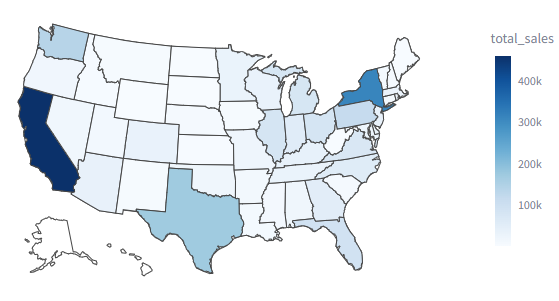

Consultando dados de janeiro de 2014 a janeiro de 2018 é possível observar que o estado da Califórnia foi aquele que possuiu o maior valor de vendas, o que se confirma no indicador gráfico no formato de barras e mapa de vendas por estado, com um total de 457.6877 mil

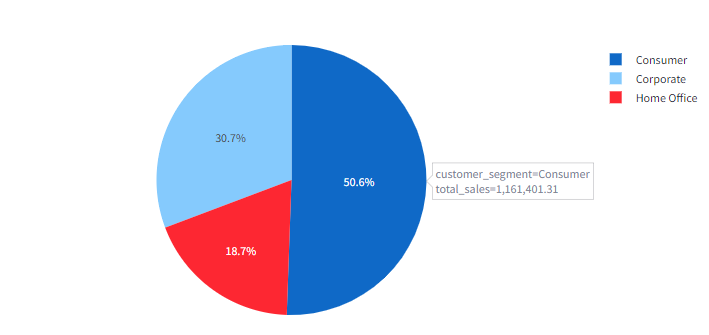

No mesmo período, observando a distribuição das vendas por segmento do cliente, nota-se que a maior parte das vendas (50,6%) foram direcionadas ao seguimento de consumidores. Em segundo lugar, encontram-se os corporativos e, por fim, o home office

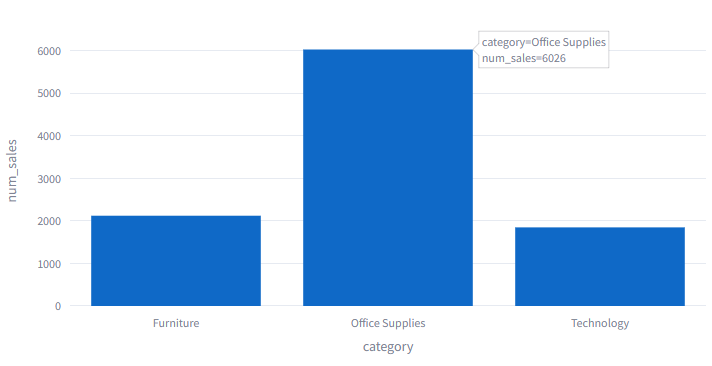

Em relação ao número de vendas por categoria de produto, nota-se que a categoria mais vendida é a de Office Supplies. Em segundo lugar, encontra-se a categoria Furniture. Pode-se afirmar que a diferença entre o número de vendas de Furniture e Technology não é um número expressivo, especialmente levando em consideração a diferença entre a maior categoria e a segunda categoria com o maior número de vendas

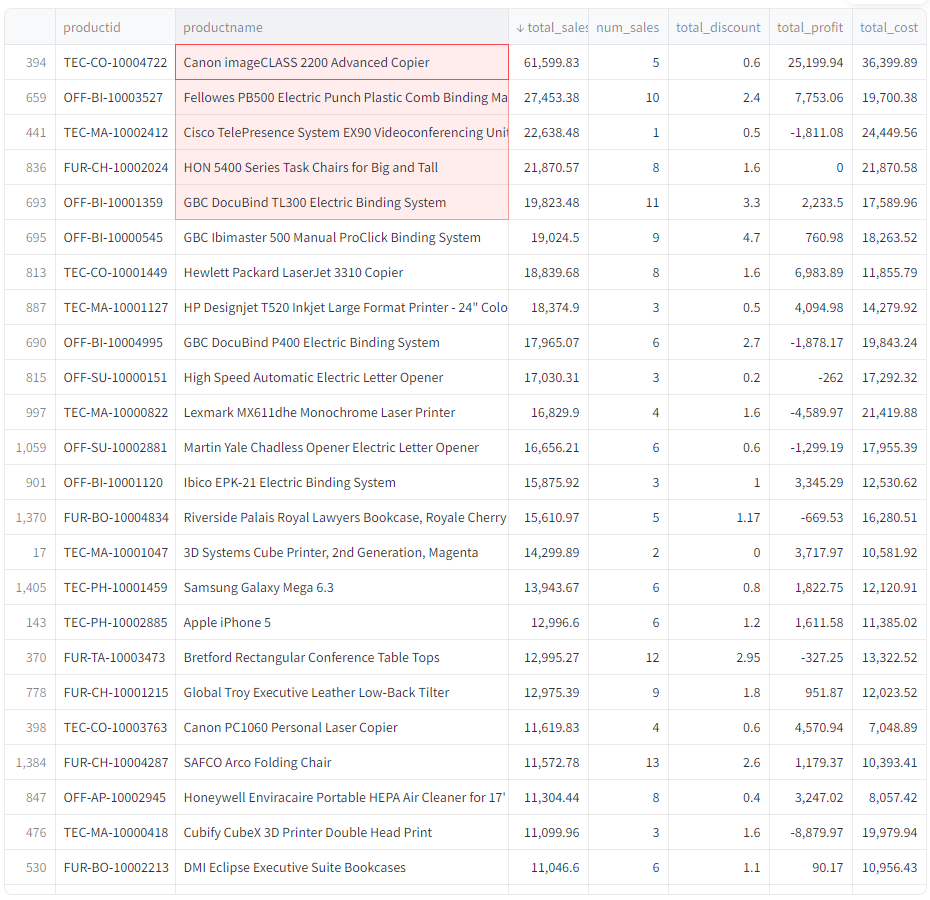

Analisando o relatório Extrato por produto, nota-se que os 5 produtos com os maiores valores totais de venda são, respectivamente:

1. Canon imageCLASS 2200 Advanced Copier
2. Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind
3. Cisco TelePresence System EX90 Videoconferencing Unit
4. HON 5400 Series Task Chairs for Big and Tall
5. GBC DocuBind TL300 Electric Binding System

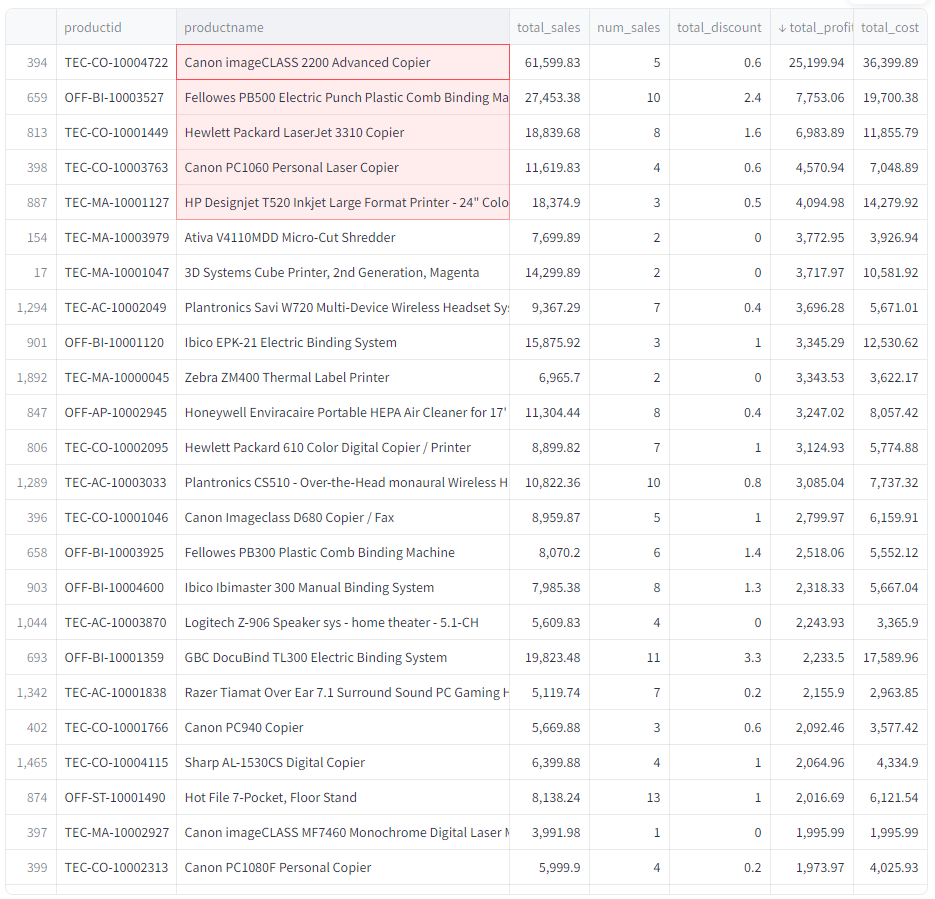

Analisando o relatório Extrato por produto, nota-se que os 5 produtos com os maiores valores totais de lucro são, respectivamente:

1. Canon imageCLASS 2200 Advanced Copier
2. Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind
3. Hewlett Packard LaserJet 3310 Copier
4. Canon PC1060 Personal Laser Copier
5. "HP Designjet T520 Inkjet Large Format Printer - 24"" Color"

Nota-se que apesar destes 3 produtos estarem presentes entre os 5 produtos com os maiores valores totais de venda, eles não se encontram entre os 5 produtos mais lucrativos:

1. Cisco TelePresence System EX90 Videoconferencing Unit
2. HON 5400 Series Task Chairs for Big and Tall
3. GBC DocuBind TL300 Electric Binding System







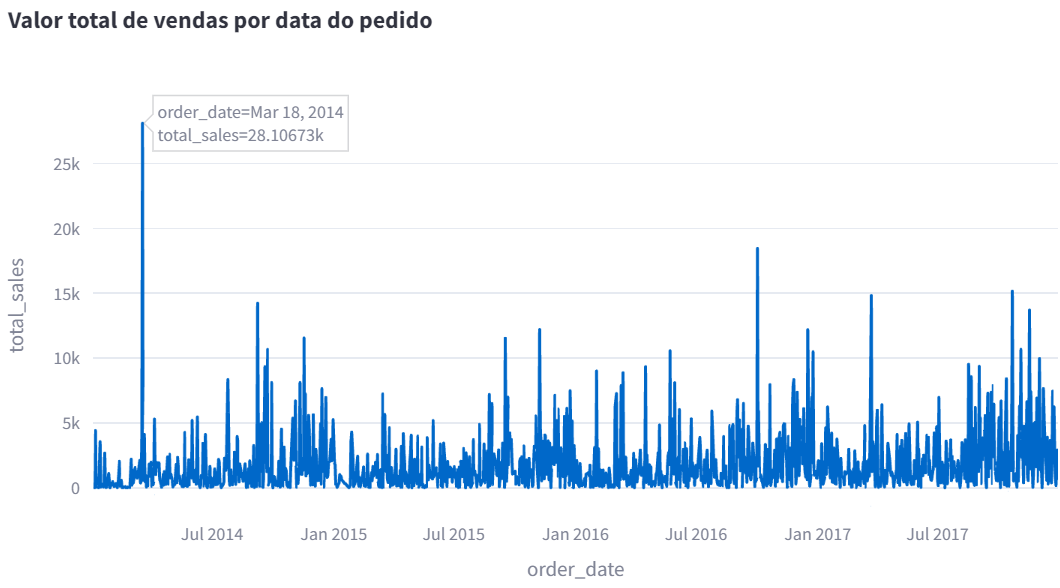

Ainda neste período, é possível notar que o dia com o maior valor total de vendas foi o dia 18 de março de 2014 com mais de 28 mil. Desde então, nenhum outro dia superou o valor total de 20 mil

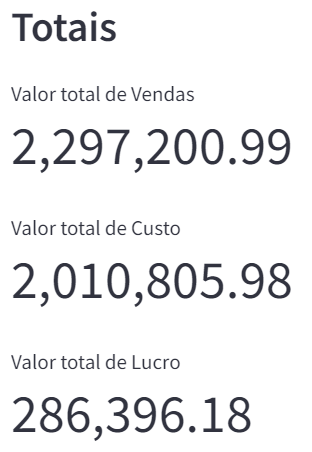

Ademais, também vale observar os valores totais de vendas, custo e lucro gerais nesse período de janeiro de 2014 a janeiro de 2018. Ao realizar tal observação é possível observar um alto custo em relação ao valor total de vendas, o que reduziu a margem de lucro a 13% do valor de vendas.

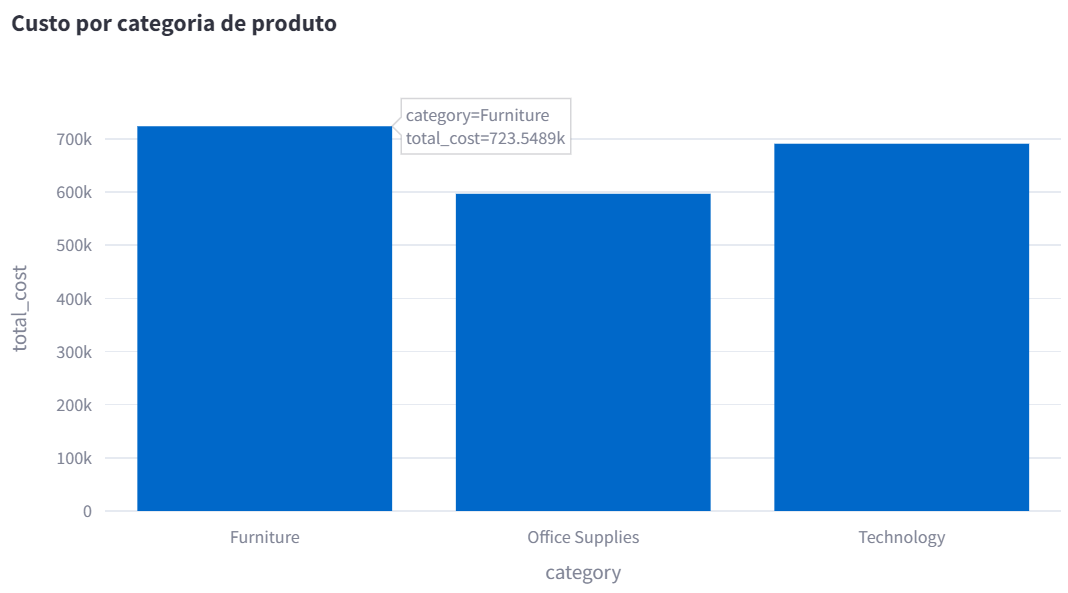

Nota-se também que esse custo deve-se em grande parte aos produtos da categoria Furniture, embora a segunda categoria com o maior custo não possua uma diferença expressiva em relação à primeira colocada.

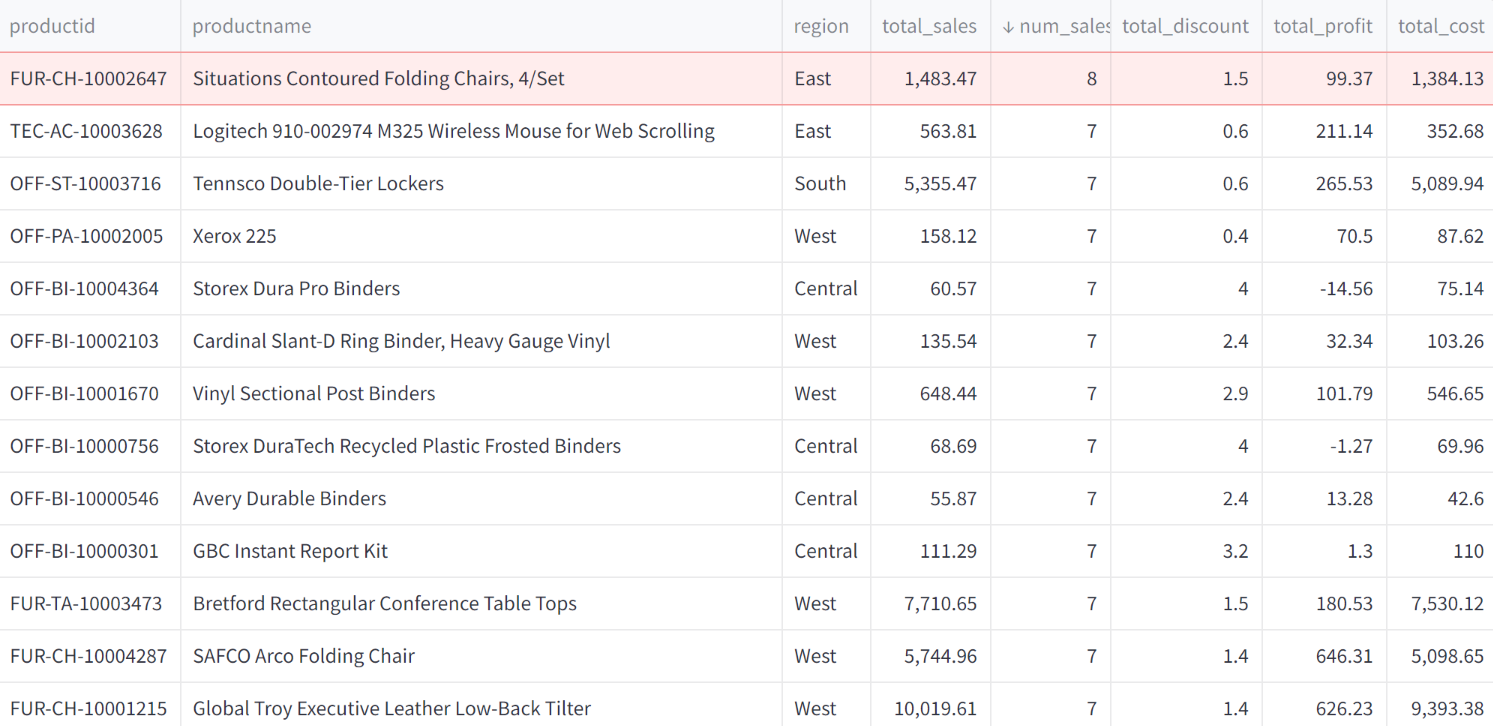

Ao analisar o Extrato por região constata-se que o produto mais vendido na região East Foi o Situations Contoured Folding Chairs, 4/Set

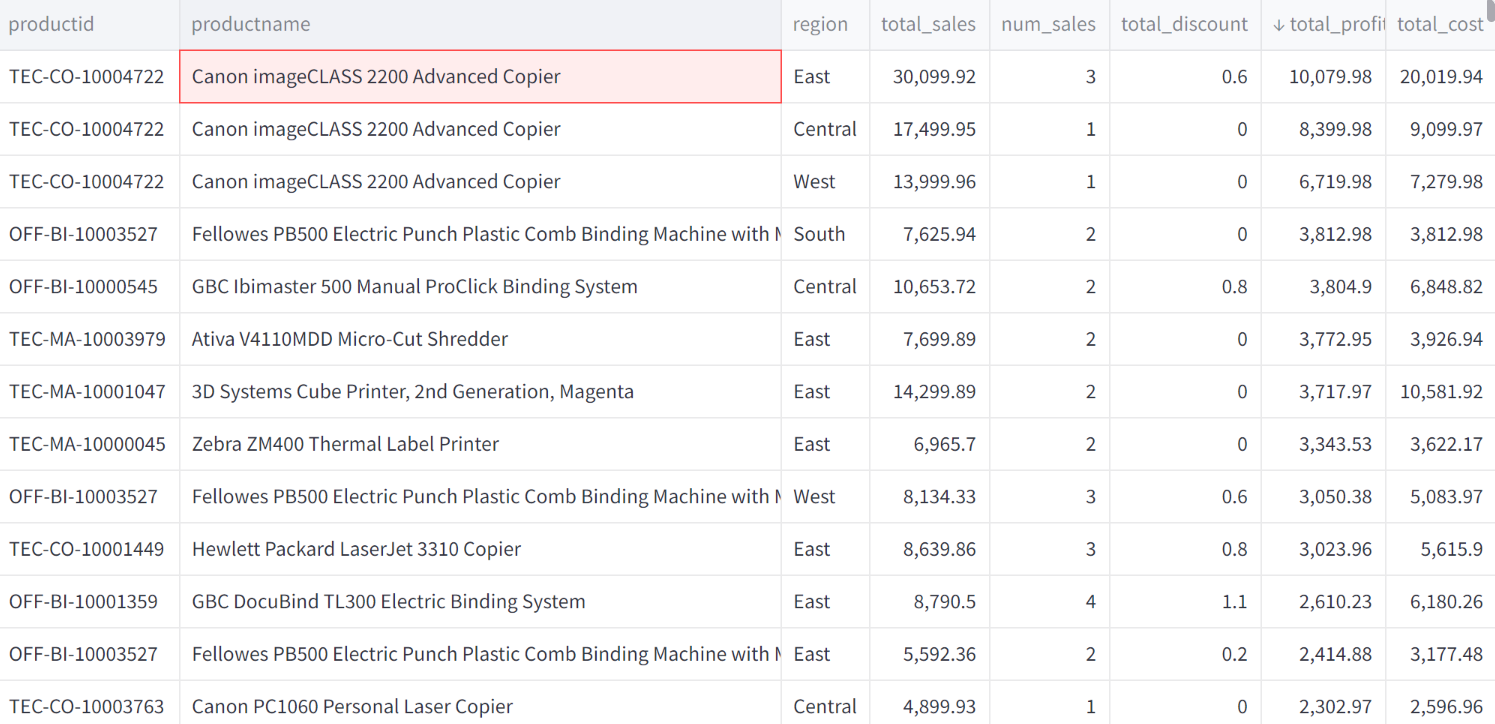

Apesar de não ser o produto mais vendido na região East, o produto mais lucrativo foi a Canon imageCLASS 2200 Advanced Copier